#***Title: Predicting Customer Churn in Subscription-Based Services***




#***Problem Statement***

The goal is to develop a machine learning model that predicts whether a customer will churn (leave the service) based on their demographic details, service usage patterns, and subscription behavior.

#***Key Objectives:***
   *  Identify factors that influence churn (e.g., high support calls, contract type, monthly charges).

   *Build a predictive model that accurately classifies customers as likely to churn or stay.

   *Improve business decisions by identifying at-risk customers early and taking preventive actions.
    
    
#***DOMAIN***

* Customer demographics (Age, Gender)

* Subscription details (Tenure, Subscription Type)

* Engagement metrics (Usage Frequency, Support Calls)

* Financial behavior (Payment Delay, Total Spend)

* Target variable: Churn (whether the customer left or stayed)

#***1 . UNDERSTANDING THE DATASET***

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
df=pd.read_csv('/content/synthetic_customer_churn.csv')
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Churn,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,56.0,Female,44,NaN,7,2.0,Standard,3391,0,NaN,NaN,NaN,NaN
1,2,69.0,Female,30,10.0,7,0.0,Basic,1835,0,NaN,NaN,NaN,NaN
2,3,46.0,Unknown,7,8.0,4,29.0,Basic,4562,0,NaN,NaN,NaN,NaN
3,4,32.0,Male,29,5.0,8,23.0,Premium,1648,0,NaN,NaN,NaN,NaN
4,5,60.0,Male,12,23.0,1,12.0,Premium,4767,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,4822,23.0,Female,47,37.0,6,25.0,Standard,4840,0,NaN,NaN,NaN,NaN
10096,1367,18.0,Female,16,20.0,5,18.0,Basic,1886,0,NaN,NaN,NaN,NaN
10097,5858,79.0,Male,20,45.0,6,22.0,Standard,1899,0,NaN,NaN,NaN,NaN
10098,768,52.0,Unknown,26,47.0,9,6.0,Basic,4173,0,NaN,NaN,NaN,NaN


In [110]:
df.shape

(10100, 14)

In [111]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Churn,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,56.0,Female,44,NaN,7,2.0,Standard,3391,0,NaN,NaN,NaN,NaN
1,2,69.0,Female,30,10.0,7,0.0,Basic,1835,0,NaN,NaN,NaN,NaN
2,3,46.0,Unknown,7,8.0,4,29.0,Basic,4562,0,NaN,NaN,NaN,NaN
3,4,32.0,Male,29,5.0,8,23.0,Premium,1648,0,NaN,NaN,NaN,NaN
4,5,60.0,Male,12,23.0,1,12.0,Premium,4767,1,NaN,NaN,NaN,NaN


In [112]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type', 'Total Spend',
       'Churn', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         10100 non-null  int64  
 1   Age                9900 non-null   float64
 2   Gender             10100 non-null  object 
 3   Tenure             10100 non-null  int64  
 4   Usage Frequency    9897 non-null   float64
 5   Support Calls      10100 non-null  int64  
 6   Payment Delay      9896 non-null   float64
 7   Subscription Type  9888 non-null   object 
 8   Total Spend        10100 non-null  int64  
 9   Churn              10100 non-null  int64  
 10  Unnamed: 10        0 non-null      float64
 11  Unnamed: 11        0 non-null      float64
 12  Unnamed: 12        0 non-null      float64
 13  Unnamed: 13        1 non-null      float64
dtypes: float64(7), int64(5), object(2)
memory usage: 1.1+ MB


In [114]:
df.isnull().sum()

,0
CustomerID,0
Age,200
Gender,0
Tenure,0
Usage Frequency,203
Support Calls,0
Payment Delay,204
Subscription Type,212
Total Spend,0
Churn,0


In [115]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Churn,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,10100.000000,9900.000000,10100.000000,9897.000000,10100.000000,9896.000000,10100.000000,10100.000000,0.0,0.0,0.0,1.0
mean,5000.955842,48.774545,29.517723,25.143175,4.589703,14.492219,2519.058812,0.306832,NaN,NaN,NaN,1.0
std,2886.756139,17.915858,17.308698,14.033660,2.872436,8.679664,1426.065496,0.461202,NaN,NaN,NaN,NaN
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,NaN,NaN,NaN,1.0
25%,2502.000000,33.000000,15.000000,13.000000,2.000000,7.000000,1269.000000,0.000000,NaN,NaN,NaN,1.0
50%,4997.500000,49.000000,30.000000,25.000000,5.000000,15.000000,2491.500000,0.000000,NaN,NaN,NaN,1.0
75%,7497.250000,64.000000,45.000000,37.000000,7.000000,22.000000,3768.000000,1.000000,NaN,NaN,NaN,1.0
max,10000.000000,79.000000,59.000000,49.000000,9.000000,29.000000,4998.000000,1.000000,NaN,NaN,NaN,1.0


Mean vs. Median (50%): If these values differ significantly, the data is skewed.

Standard Deviation (std): High values mean more variation in the data.

Min & Max: Help identify outliers (e.g., an unusually high Total Spend).

In [116]:
df.duplicated().sum()

np.int64(100)

#***2 . DATA CLEANING AND PREPROCESSING***


In [117]:
if 'CustomerID' in df.columns:
    df.drop(columns=['CustomerID'], inplace=True)
if 'Unnamed: 10' in df.columns:
    df.drop(columns=['Unnamed: 10'], inplace=True)
if 'Unnamed: 11' in df.columns:
    df.drop(columns=['Unnamed: 11'], inplace=True)
if 'Unnamed: 12' in df.columns:
    df.drop(columns=['Unnamed: 12'], inplace=True)
if 'Unnamed: 13' in df.columns:
    df.drop(columns=['Unnamed: 13'], inplace=True)
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Churn
0,56.0,Female,44,NaN,7,2.0,Standard,3391,0
1,69.0,Female,30,10.0,7,0.0,Basic,1835,0
2,46.0,Unknown,7,8.0,4,29.0,Basic,4562,0
3,32.0,Male,29,5.0,8,23.0,Premium,1648,0
4,60.0,Male,12,23.0,1,12.0,Premium,4767,1
...,...,...,...,...,...,...,...,...,...
10095,23.0,Female,47,37.0,6,25.0,Standard,4840,0
10096,18.0,Female,16,20.0,5,18.0,Basic,1886,0
10097,79.0,Male,20,45.0,6,22.0,Standard,1899,0
10098,52.0,Unknown,26,47.0,9,6.0,Basic,4173,0


drop the customer id column , there is not important column

In [118]:
df["Gender"].replace("Unknown", df["Gender"].mode()[0], inplace=True)
df

<ipython-input-118-f3296081696d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace("Unknown", df["Gender"].mode()[0], inplace=True)


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Churn
0,56.0,Female,44,NaN,7,2.0,Standard,3391,0
1,69.0,Female,30,10.0,7,0.0,Basic,1835,0
2,46.0,Female,7,8.0,4,29.0,Basic,4562,0
3,32.0,Male,29,5.0,8,23.0,Premium,1648,0
4,60.0,Male,12,23.0,1,12.0,Premium,4767,1
...,...,...,...,...,...,...,...,...,...
10095,23.0,Female,47,37.0,6,25.0,Standard,4840,0
10096,18.0,Female,16,20.0,5,18.0,Basic,1886,0
10097,79.0,Male,20,45.0,6,22.0,Standard,1899,0
10098,52.0,Female,26,47.0,9,6.0,Basic,4173,0


missing values in categorical columns, we often fill them using the mode:

In [120]:
# prompt: ordinal encoder

from sklearn.preprocessing import OrdinalEncoder

# Assuming 'Subscription Type' is the column you want to encode
ordinal_encoder = OrdinalEncoder()
df['Subscription Type'] = ordinal_encoder.fit_transform(df[['Subscription Type']])
df


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Churn
0,56.0,Female,44,25.143175,7,2.0,2.0,3391,0
1,69.0,Female,30,10.000000,7,0.0,0.0,1835,0
2,46.0,Female,7,8.000000,4,29.0,0.0,4562,0
3,32.0,Male,29,5.000000,8,23.0,1.0,1648,0
4,60.0,Male,12,23.000000,1,12.0,1.0,4767,1
...,...,...,...,...,...,...,...,...,...
10095,23.0,Female,47,37.000000,6,25.0,2.0,4840,0
10096,18.0,Female,16,20.000000,5,18.0,0.0,1886,0
10097,79.0,Male,20,45.000000,6,22.0,2.0,1899,0
10098,52.0,Female,26,47.000000,9,6.0,0.0,4173,0


In [123]:
# Strip leading/trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Now try filling NaN values again

df['Usage Frequency'].fillna(df['Usage Frequency'].mean(),inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Subscription Type'].fillna(df['Subscription Type'].mean(),inplace=True)
df['Payment Delay'].fillna(df['Payment Delay'].mean(),inplace=True)
df

<ipython-input-123-a33f02484aeb>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Usage Frequency'].fillna(df['Usage Frequency'].mean(),inplace=True)
<ipython-input-123-a33f02484aeb>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Churn
0,56.0,Female,44,25.143175,7,2.0,2.0,3391,0
1,69.0,Female,30,10.000000,7,0.0,0.0,1835,0
2,46.0,Female,7,8.000000,4,29.0,0.0,4562,0
3,32.0,Male,29,5.000000,8,23.0,1.0,1648,0
4,60.0,Male,12,23.000000,1,12.0,1.0,4767,1
...,...,...,...,...,...,...,...,...,...
10095,23.0,Female,47,37.000000,6,25.0,2.0,4840,0
10096,18.0,Female,16,20.000000,5,18.0,0.0,1886,0
10097,79.0,Male,20,45.000000,6,22.0,2.0,1899,0
10098,52.0,Female,26,47.000000,9,6.0,0.0,4173,0


In [124]:
df.isnull().sum()

,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Total Spend,0
Churn,0


In [125]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Churn
0,56.0,0,44,25.143175,7,2.0,2.0,3391,0
1,69.0,0,30,10.000000,7,0.0,0.0,1835,0
2,46.0,0,7,8.000000,4,29.0,0.0,4562,0
3,32.0,1,29,5.000000,8,23.0,1.0,1648,0
4,60.0,1,12,23.000000,1,12.0,1.0,4767,1
...,...,...,...,...,...,...,...,...,...
10095,23.0,0,47,37.000000,6,25.0,2.0,4840,0
10096,18.0,0,16,20.000000,5,18.0,0.0,1886,0
10097,79.0,1,20,45.000000,6,22.0,2.0,1899,0
10098,52.0,0,26,47.000000,9,6.0,0.0,4173,0


#***SKEWNESS***

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Usage Frequency'}>,
        <Axes: title={'center': 'Support Calls'}>,
        <Axes: title={'center': 'Payment Delay'}>],
       [<Axes: title={'center': 'Subscription Type'}>,
        <Axes: title={'center': 'Total Spend'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

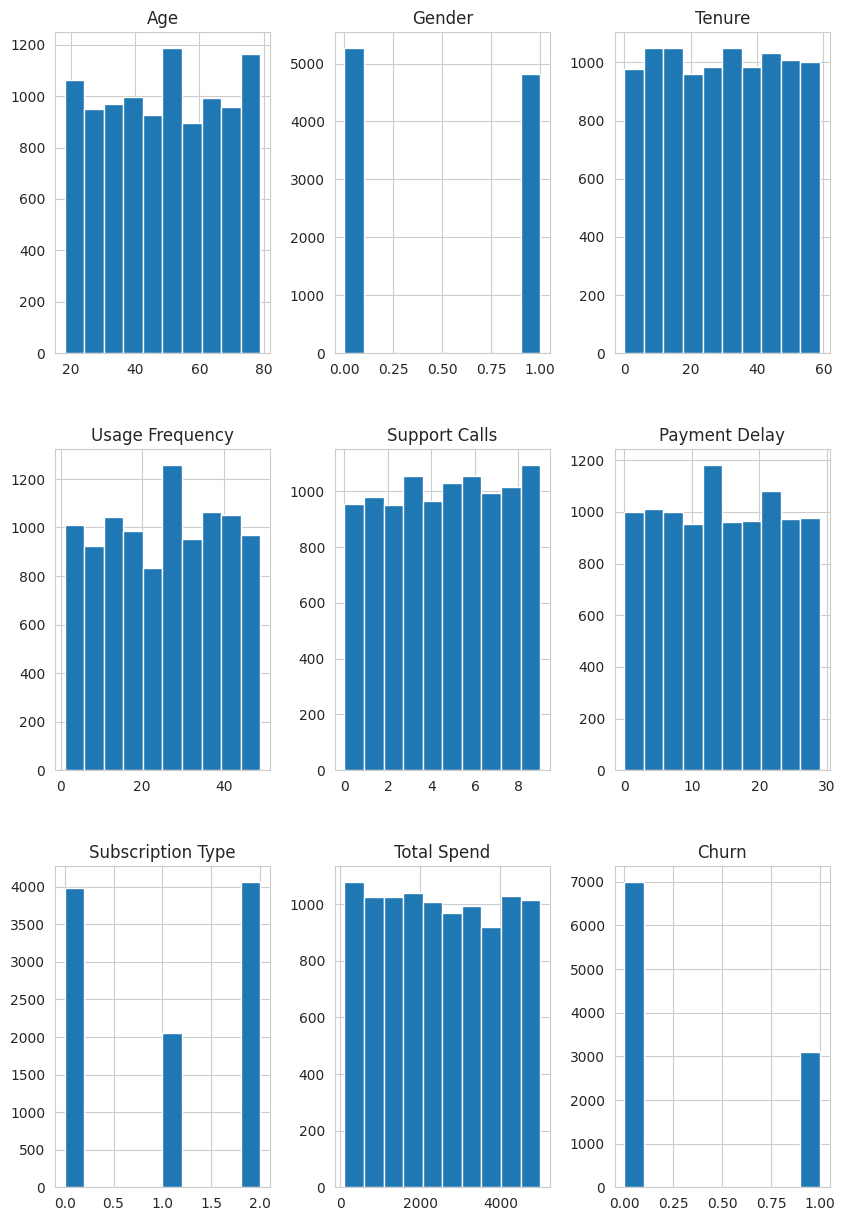

In [126]:
df.hist(figsize=(10,15))

there is no skewness

In [134]:
df.isnull().sum()

,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Total Spend,0
Churn,0


#**3 . VISUALIZATION**

#  univariate analysis


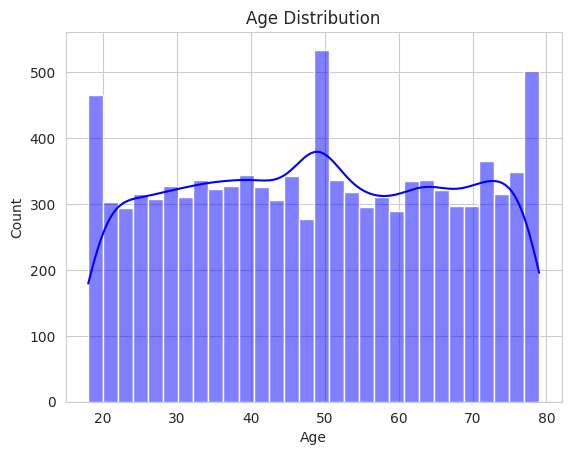

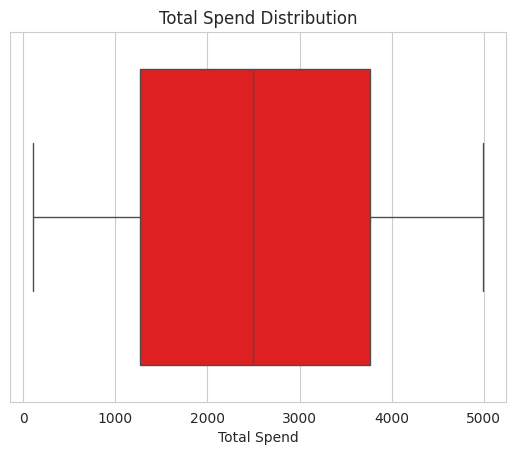

<ipython-input-128-4c12cdff1585>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Subscription Type"], palette="husl")


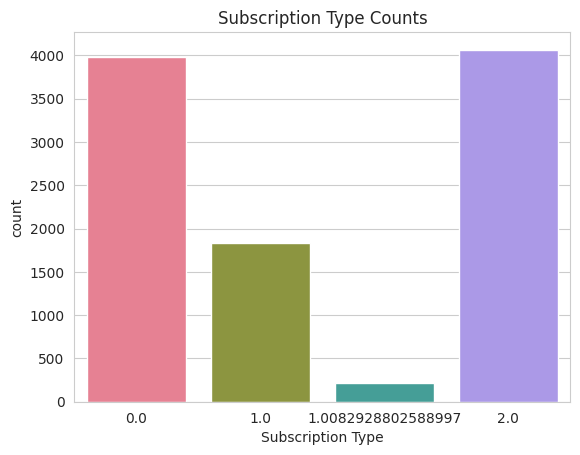

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for numerical data
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()

# Box plot for outliers
sns.boxplot(x=df["Total Spend"], color="red")
plt.title("Total Spend Distribution")
plt.show()

# Bar chart for categorical data
sns.countplot(x=df["Subscription Type"], palette="husl")
plt.title("Subscription Type Counts")
plt.show()





* Plots the distribution of the Age variable.
* Displays the spread and outliers in the Total Spend variable.
* Visualizes the frequency of different Subscription Types.

#bivariate analysis

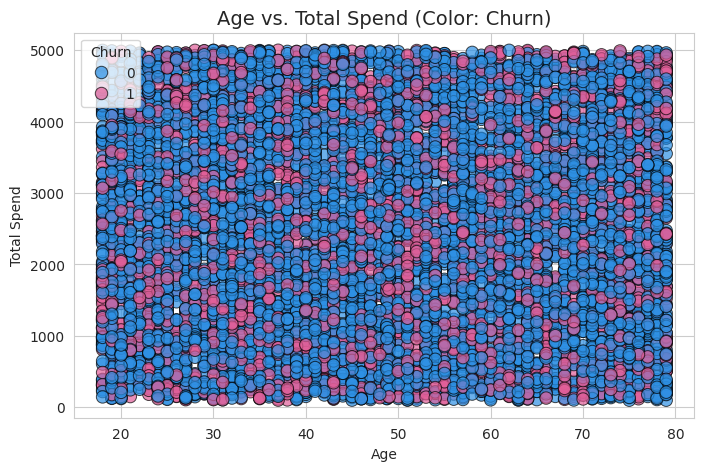

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme for better visuals
sns.set_style("whitegrid")

# Define a vibrant color palette for churn
custom_palette = {0: "#2E91E5", 1: "#E15F99"}  # Blue for Non-Churn, Pink for Churn

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Age", y="Total Spend", hue="Churn", palette=custom_palette, s=80, edgecolor="black", alpha=0.7)

# Customize title and labels
plt.title("Age vs. Total Spend (Color: Churn)", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Total Spend")

plt.legend(title="Churn", loc="upper left")
plt.show()

This code creates a colorful scatter plot to visualize the relationship between Age and Total Spend, distinguishing customers based on their Churn status


<ipython-input-132-0abb7a4c9dde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Subscription Type", y="Total Spend", data=df, palette="pastel")


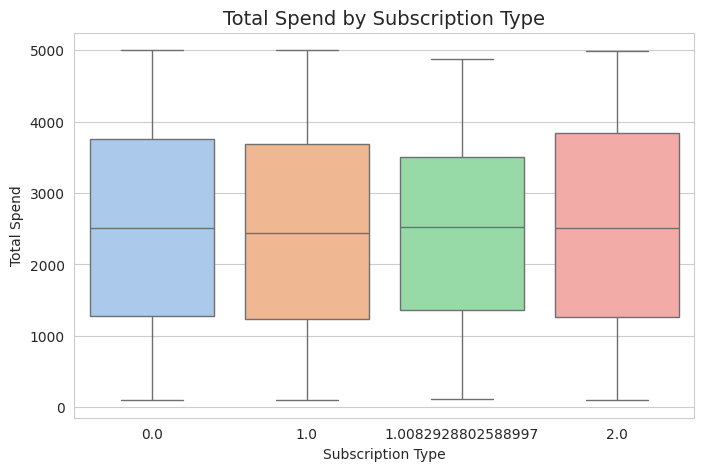

In [132]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Subscription Type", y="Total Spend", data=df, palette="pastel")

plt.title("Total Spend by Subscription Type", fontsize=14)
plt.xlabel("Subscription Type")
plt.ylabel("Total Spend")

plt.show()


This code creates a box plot to compare Total Spend across different Subscription Types.

#*Multivariate*


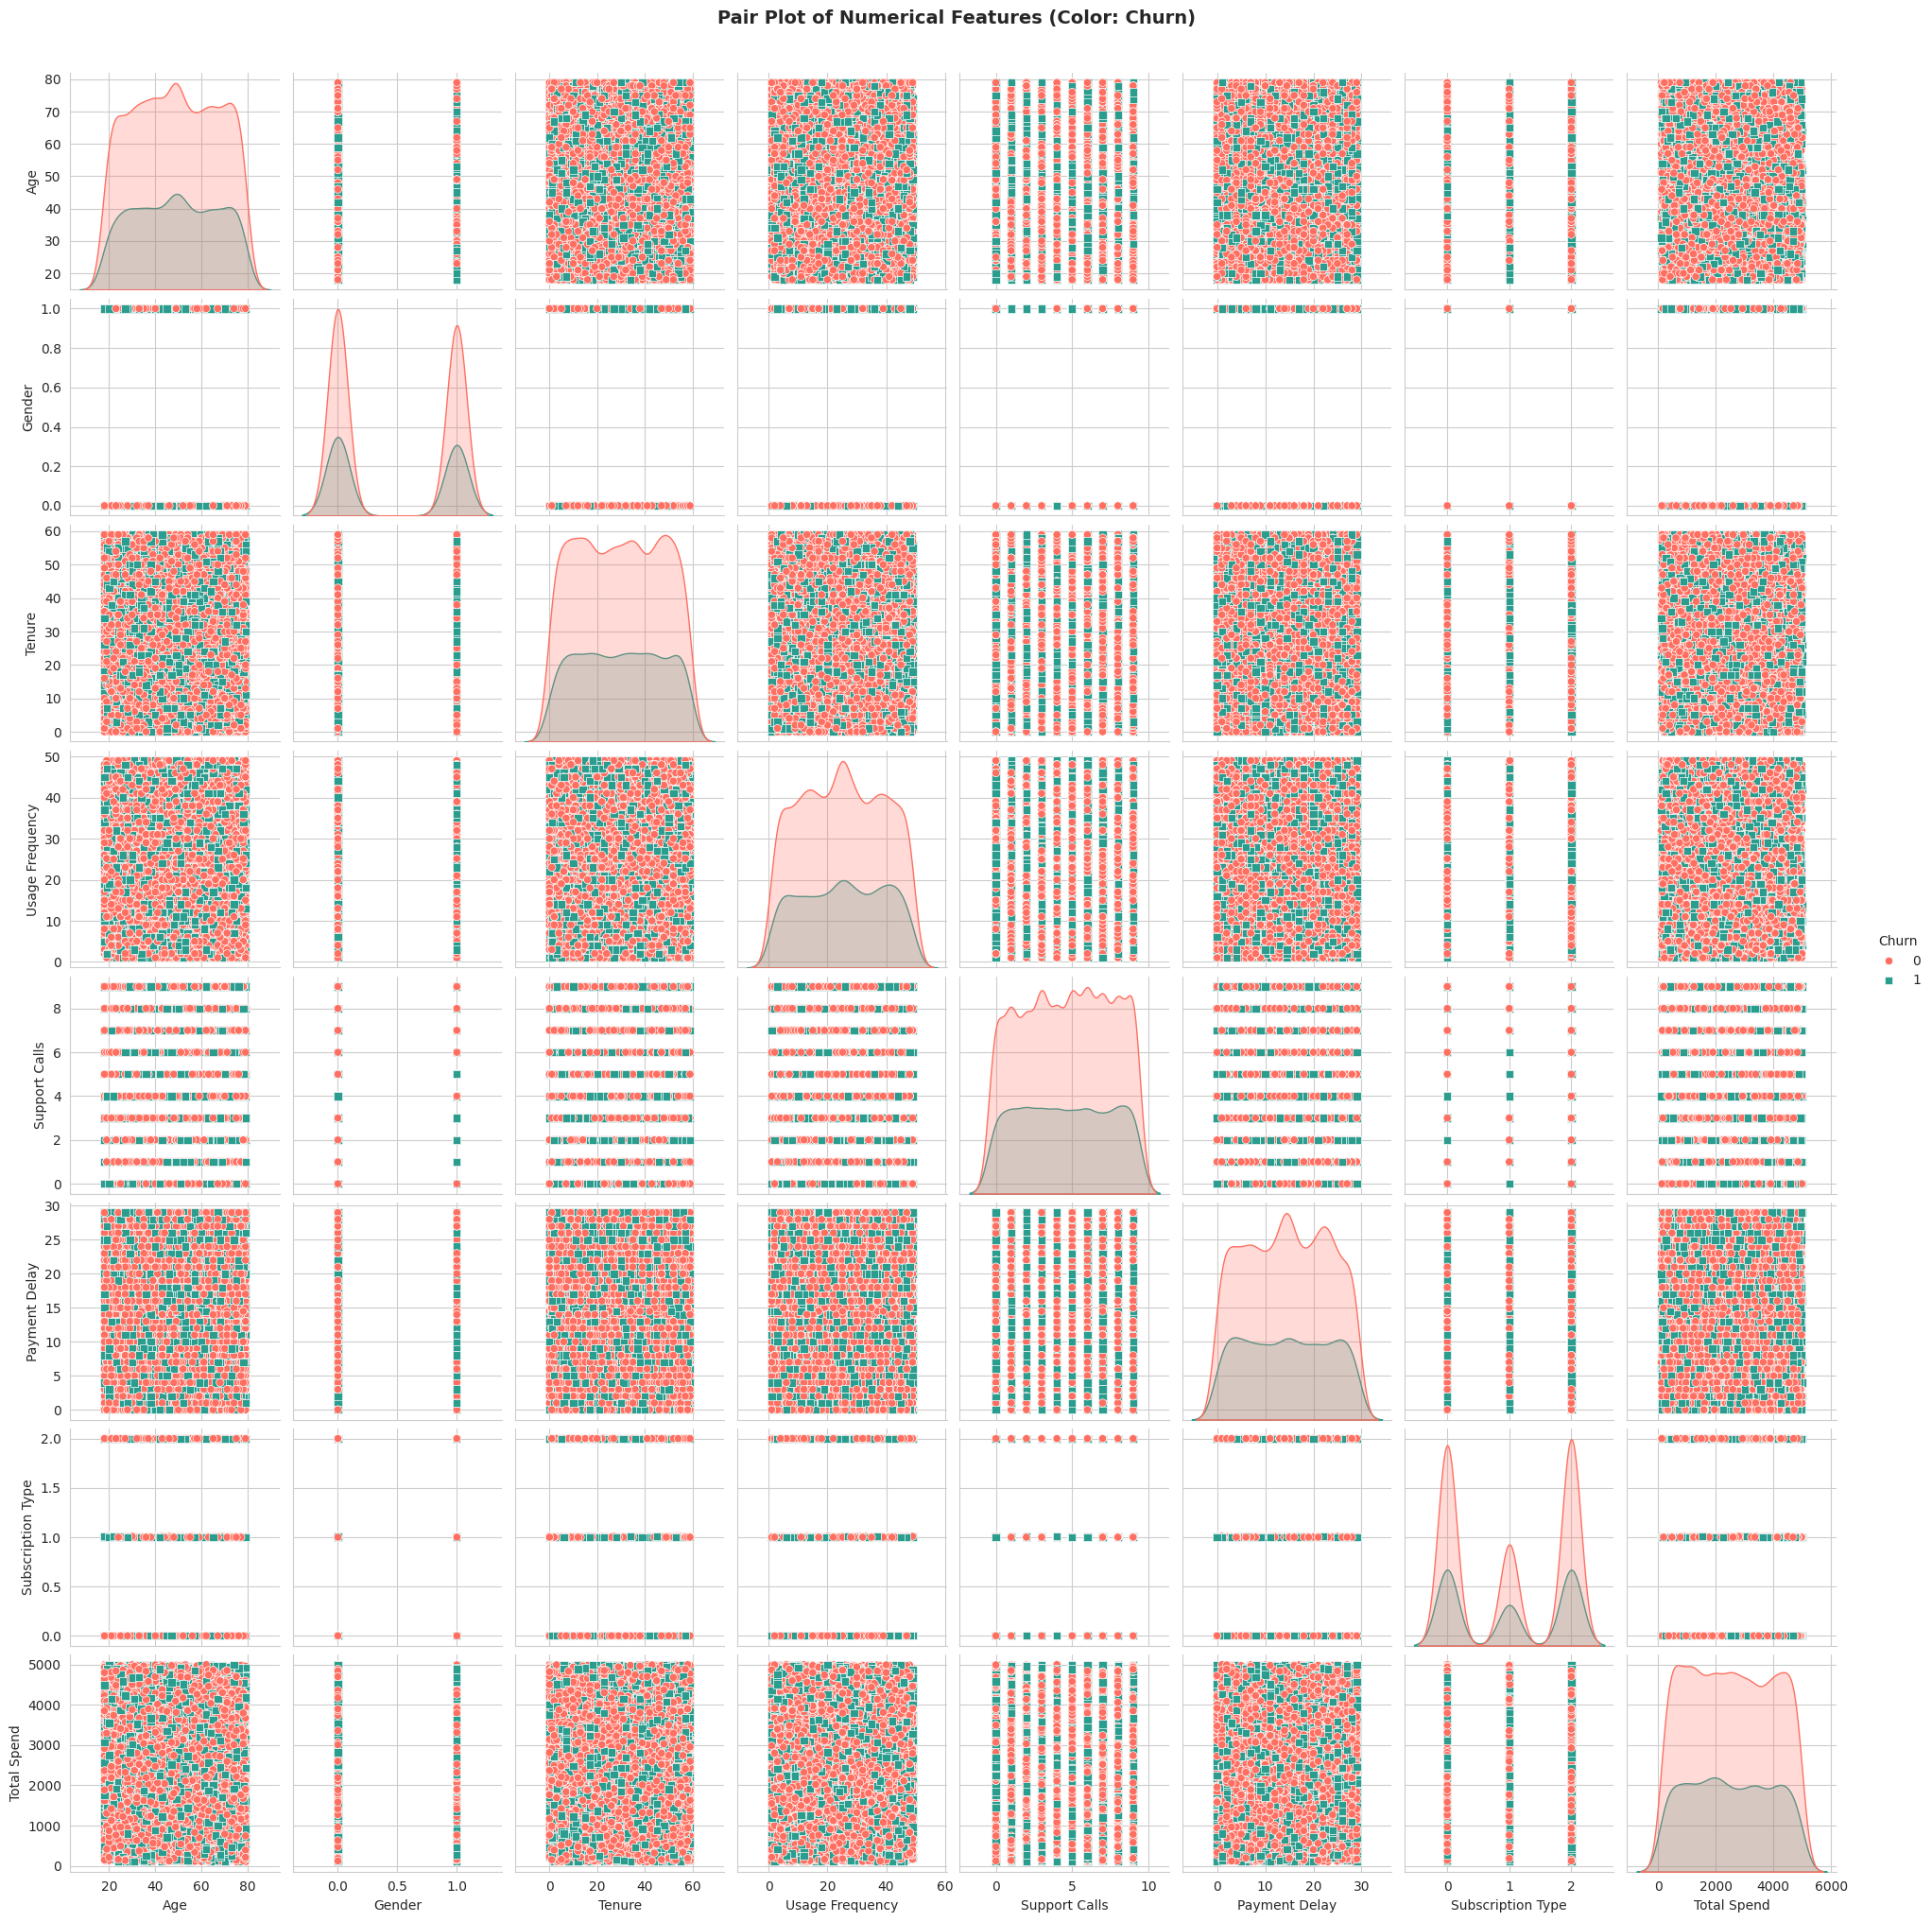

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean & modern style
sns.set_style("whitegrid")

# Define a custom vibrant color palette
custom_palette = ["#FF6F61", "#2A9D8F"]  # Coral Red for Churn, Teal for Non-Churn

# Create the pair plot with new colors
sns.pairplot(df, hue="Churn", palette=custom_palette, diag_kind="kde", markers=["o", "s"])

# Add a title with better spacing
plt.suptitle("Pair Plot of Numerical Features (Color: Churn)", fontsize=14, y=1.02, fontweight="bold")

plt.show()


This code generates a pair plot to visualize relationships between numerical features in the dataset, with points colored by Churn status.

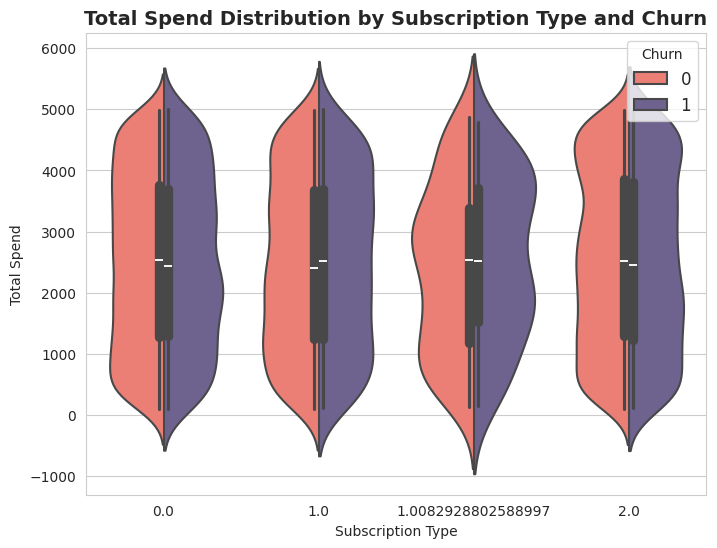

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Use a bright & vibrant color palette
sns.violinplot(x="Subscription Type", y="Total Spend", hue="Churn", data=df, split=True,
               palette=["#FF6F61", "#6B5B95"], linewidth=1.5)  # Coral & Purple colors

# Customize title and labels
plt.title("Total Spend Distribution by Subscription Type and Churn", fontsize=14, fontweight="bold")
plt.xlabel("Subscription Type")
plt.ylabel("Total Spend")

# Update legend position and styling
plt.legend(title="Churn", loc="upper right", fontsize=12)

plt.show()


This code generates a violin plot to visualize the distribution of Total Spend across different Subscription Types, separated by Churn status.

#***OUTLIER CHECKING***


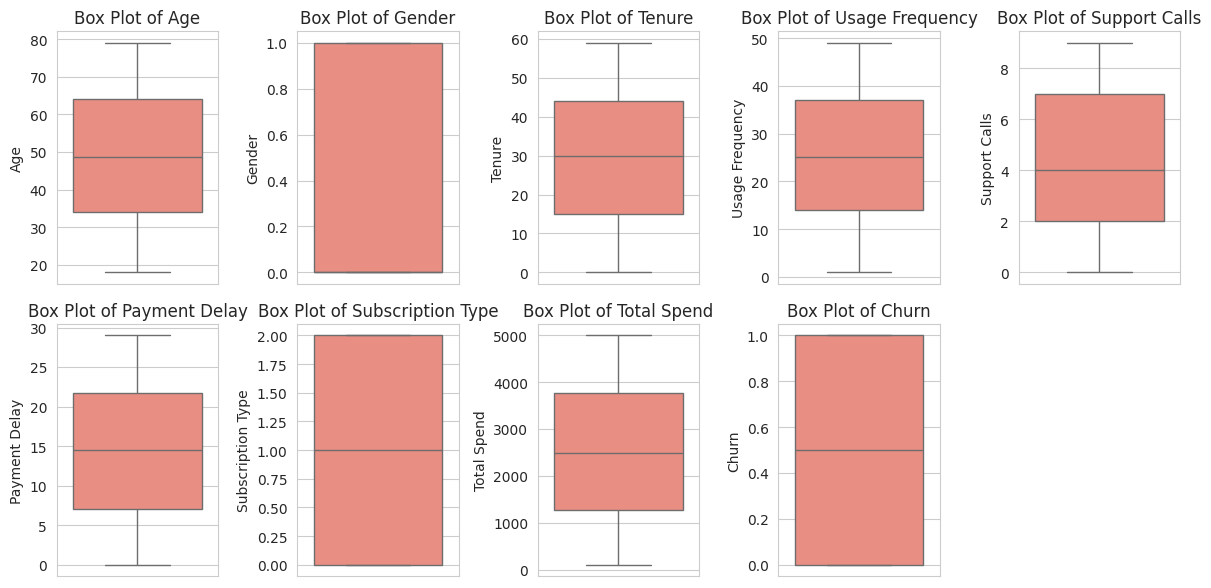

In [153]:
numerical_columns = df.select_dtypes(include=["number"]).columns

# Plot boxplots for numerical features
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, (len(numerical_columns) // 2) + 1, i)
    sns.boxplot(y=df[col], color="salmon")
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()


* THERE IS NO OUTLIERS

#***CORRELATION***

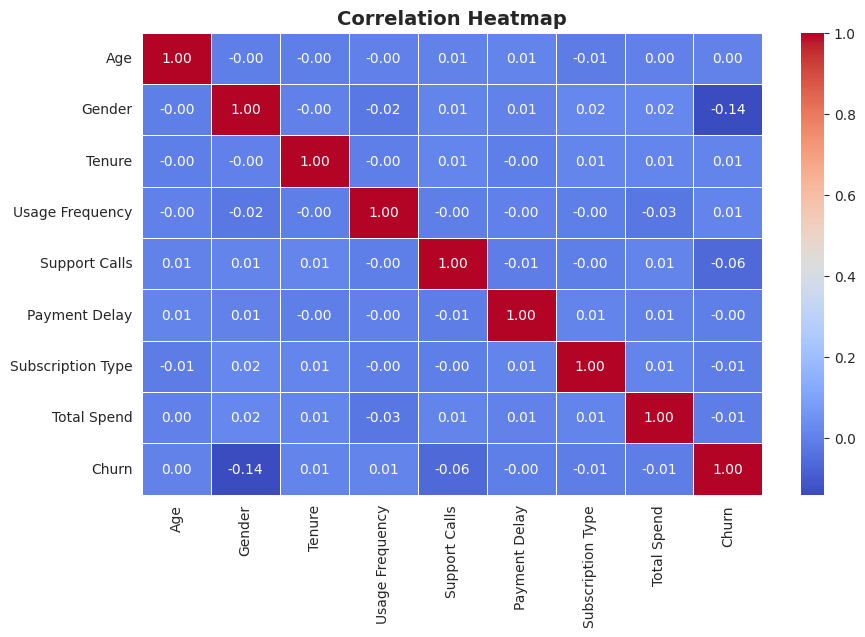

In [154]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()

* there is no correlation

#**over sampling**

<Axes: xlabel='count', ylabel='Churn'>

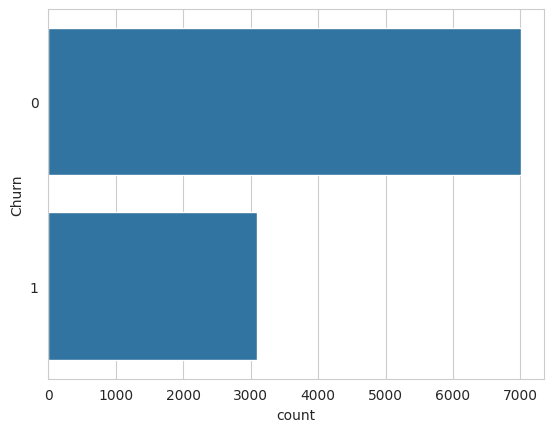

In [141]:
sns.countplot(y="Churn",data=df)

* It helps visualize class distribution, showing whether the dataset is balanced or imbalanced.

In [142]:
# install imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE # import with correct module name

In [143]:
#assuming 'df' is your DataFrame with 'Churn' as the target variable
x=df.drop('Churn',axis=1)
y=df['Churn']


#screatan oversampler object (choose either randomoversampler or SMOTE)
#Uncomment the one you want to use
#ros=randomOversampler() for random Oversampling
ros=SMOTE()#for sythetic minority

#Apply the oversampler to the data
x_resampled,y_resampled=ros.fit_resample(x,y)

x_resampled=pd.DataFrame(x_resampled,columns=x.columns)
y_resampled=pd.Series(y_resampled,name='Churn')

df=pd.concat([x_resampled,y_resampled],axis=1)

<Axes: xlabel='count', ylabel='Churn'>

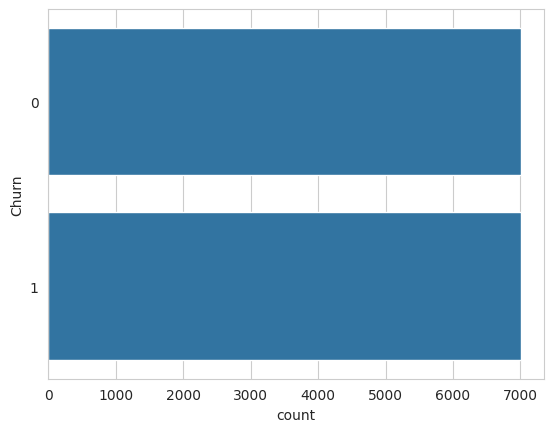

In [149]:
sns.countplot(y="Churn", data=df)

#***STANDARD SCALING***

In [156]:
from sklearn.preprocessing import StandardScaler
numerical_cols = df.select_dtypes(include=["number"]).columns

# Initializing the Standard Scaler
scaler = StandardScaler()

# Applying standard scaling (Z-score normalization)
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the scaled dataset
print(df_scaled.head())

        Age    Gender    Tenure  Usage Frequency  Support Calls  \
0  0.415602 -0.834869  0.851491        -0.001181       0.932191   
1  1.164378 -0.834869  0.028750        -1.117555       0.932191   
2 -0.160380 -0.834869 -1.322896        -1.264998      -0.161658   
3 -0.966754  1.197793 -0.030017        -1.486162       1.296808   
4  0.645995  1.197793 -1.029060        -0.159178      -1.255508   

   Payment Delay  Subscription Type  Total Spend  Churn  
0      -1.498643           1.169673     0.613933   -1.0  
1      -1.738871          -1.179901    -0.475729   -1.0  
2       1.744427          -1.179901     1.433981   -1.0  
3       1.023744          -0.005114    -0.606684   -1.0  
4      -0.297506          -0.005114     1.577542    1.0  


* This code applies Standard Scaling (Z-score normalization) to all numerical columns in the dataset using StandardScaler from sklearn.preprocessing.

#***Split data into training and testing sets***

In [157]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


* This code splits the dataset into training and testing sets

#***Model Training and Evaluation***

In [158]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Total Spend', 'Churn'],
      dtype='object')

In [159]:
independet_feature = ['Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Subscription Type','Payment Delay','Total Spend','Age']
dependet_feature = ['Churn']
x = df[independet_feature]
y = df[dependet_feature]

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'df' is your preprocessed DataFrame
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Train models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Evaluate models
print("Random Forest:")
print(classification_report(y_test, rf_preds))
print(f"Accuracy: {accuracy_score(y_test, rf_preds)}")

print("\nGradient Boosting:")
print(classification_report(y_test, gb_preds))
print(f"Accuracy: {accuracy_score(y_test, gb_preds)}")

Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      1468
           1       0.79      0.63      0.70      1333

    accuracy                           0.74      2801
   macro avg       0.75      0.74      0.74      2801
weighted avg       0.75      0.74      0.74      2801

Accuracy: 0.7443770082113531

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.66      0.97      0.79      1468
           1       0.92      0.46      0.62      1333

    accuracy                           0.73      2801
   macro avg       0.79      0.71      0.70      2801
weighted avg       0.79      0.73      0.71      2801

Accuracy: 0.7258122099250268


* This code trains and evaluates two machine learning models (Random Forest & Gradient Boosting) for customer churn prediction

#***GradientBoostingClassifier***

In [161]:
# Create a GradientBoostingClassifiert Classifier object
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # Import necessary metrics

model_1 = GradientBoostingClassifier(n_estimators=150,
								learning_rate=0.1,
								random_state=100,
								subsample=0.8)


# You can adjust hyperparameters

# Train the model
model_1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_1.predict(X_test)

print("accuracy_score",accuracy_score(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred, average="weighted"))

print('Recall:', recall_score(y_test, y_pred, average="weighted"))

print('F1 Score:', f1_score(y_test, y_pred, average="weighted"))

cm = confusion_matrix(y_test, y_pred)
cm

accuracy_score 0.7475901463762942
Precision: 0.7937030187144485
Recall: 0.7475901463762942
F1 Score: 0.7336476163620153


array([[1401,   67],
       [ 640,  693]])

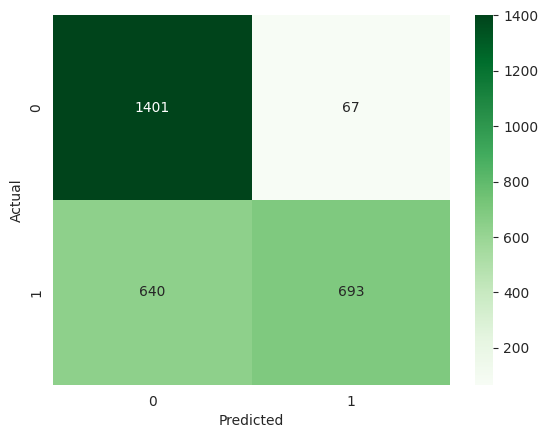

In [162]:
from sklearn.metrics import confusion_matrix
import numpy as np
conf_matrix=np.array([[1401, 67],
       [640, 693]])
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* clear visualization of model performance, helping to analyze false positives, false negatives, true positives, and true negatives in classification results.